In [1]:
%reload_ext autoreload

In [2]:
import pandas as pd
import os

In [3]:
os.chdir("..")

In [4]:
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week8\\Causal_Inference'

In [5]:
# Load the driver locations during request dataset
driver_locations = pd.read_csv('data/driver_locations_during_request.csv')
completed_features = pd.read_csv('data/complete_orders_features_engineered.csv')

In [6]:
len(driver_locations)

1557740

In [7]:
len(completed_features)

505323

In [30]:
completed_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505323 entries, 0 to 505322
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Trip ID                       505323 non-null  int64  
 1   Trip Start Time               505323 non-null  object 
 2   Trip End Time                 505323 non-null  object 
 3   Trip Duration(minutes)        505323 non-null  float64
 4   Day of Week                   505323 non-null  int64  
 5   Hour of Day                   505323 non-null  int64  
 6   Origin Lat                    505323 non-null  float64
 7   Origin Lon                    505323 non-null  float64
 8   Destination Lat               505323 non-null  float64
 9   Destination Lon               505323 non-null  float64
 10  Trip Distance (km)            505323 non-null  float64
 11  Average Temperature(Celcius)  505323 non-null  float64
 12  Wind Speed(km/h)              505323 non-nul

In [8]:
driver_locations.nunique()

id               1557740
order_id           26492
driver_id           1213
driver_action          2
lat               194406
lng               170385
created_at             0
updated_at             0
dtype: int64

In [9]:
driver_locations.rename(columns={'lat': 'Driver Lat', 'lng': 'Driver Lon', 'driver_action': 'Driver Action', 'driver_id': 'Driver ID'}, inplace=True)

In [10]:
driver_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   Driver ID      1557740 non-null  int64  
 3   Driver Action  1557740 non-null  object 
 4   Driver Lat     1557740 non-null  float64
 5   Driver Lon     1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [11]:
driver_locations.isna().sum()

id                     0
order_id               0
Driver ID              0
Driver Action          0
Driver Lat             0
Driver Lon             0
created_at       1557740
updated_at       1557740
dtype: int64

In [12]:
# Drop columns with all missing values
driver_locations_cleaned = driver_locations.drop(columns=['created_at', 'updated_at'])

In [14]:
driver_locations_cleaned.isna().sum()

id               0
order_id         0
Driver ID        0
Driver Action    0
Driver Lat       0
Driver Lon       0
dtype: int64

In [16]:
driver_locations.shape, completed_features.shape

((1557740, 8), (505323, 26))

In [17]:
# Display basic information and first few rows of the cleaned dataset
driver_locations_cleaned_info = driver_locations_cleaned.info()
driver_locations_cleaned_head = driver_locations_cleaned.head()

driver_locations_cleaned_info, driver_locations_cleaned_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   Driver ID      1557740 non-null  int64  
 3   Driver Action  1557740 non-null  object 
 4   Driver Lat     1557740 non-null  float64
 5   Driver Lon     1557740 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 71.3+ MB


(None,
    id  order_id  Driver ID Driver Action  Driver Lat  Driver Lon
 0   1    392001     243828      accepted    6.602207    3.270465
 1   2    392001     243588      rejected    6.592097    3.287445
 2   3    392001     243830      rejected    6.596133    3.281784
 3   4    392001     243539      rejected    6.596142    3.280526
 4   5    392001     171653      rejected    6.609232    3.288800)

In [18]:
from utils.prepare_data import DataPreparation

prepares = DataPreparation()

In [19]:
driver_locations_cleaned.head(
    3
)

,id,order_id,Driver ID,Driver Action,Driver Lat,Driver Lon
0,1,392001,243828,accepted,6.602207,3.270465
1,2,392001,243588,rejected,6.592097,3.287445
2,3,392001,243830,rejected,6.596133,3.281784


In [20]:
len(driver_locations_cleaned)

1557740

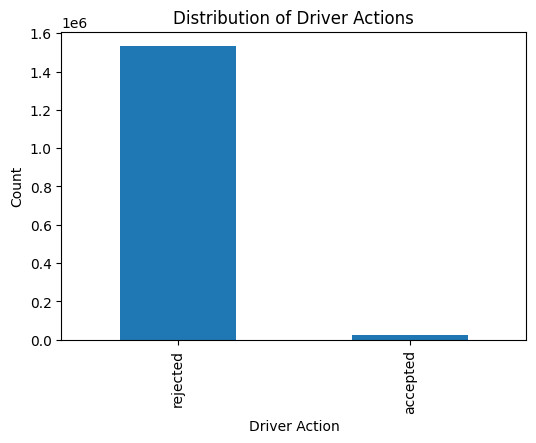

In [22]:
import matplotlib.pyplot as plt

# Plot the distribution of driver actions
plt.figure(figsize=(6, 4))
driver_locations_cleaned['Driver Action'].value_counts().plot(kind='bar')
plt.xlabel('Driver Action')
plt.ylabel('Count')
plt.title('Distribution of Driver Actions')
plt.show()


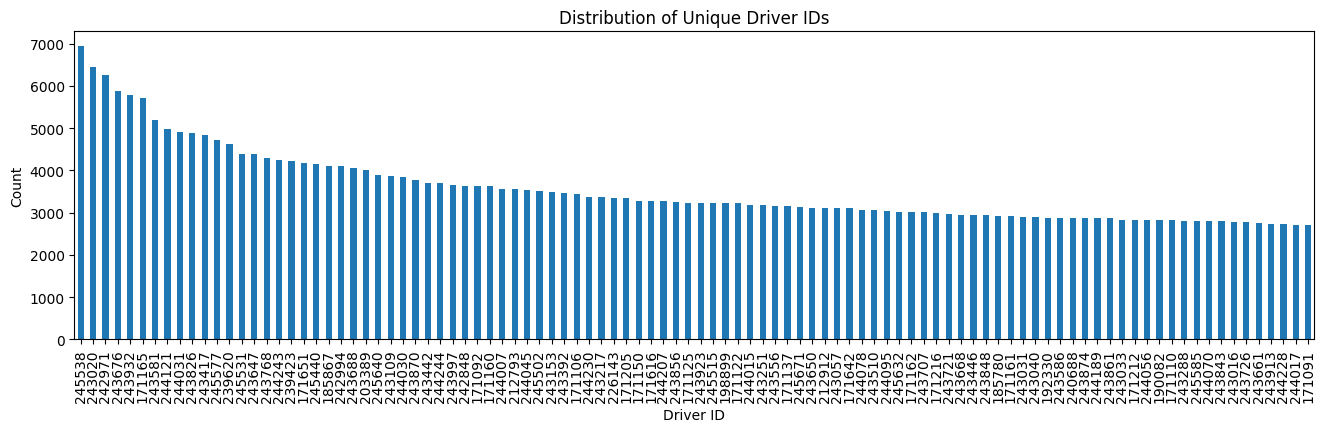

In [23]:
# plot unique driver ids
plt.figure(figsize=(16, 4))
driver_locations_cleaned['Driver ID'].value_counts().head(100).plot(kind='bar')
plt.xlabel('Driver ID')
plt.ylabel('Count')
plt.title('Distribution of Unique Driver IDs')
plt.show()

In [29]:
#get the number of times a driver has been accepted or rejected by unique drivers id

driver_locations_cleaned.groupby('Driver ID')[['Driver Action',]].value_counts()

Driver ID  Driver Action
121981     rejected         2133
           accepted           16
171091     rejected         2696
           accepted           19
171092     rejected         3619
                            ... 
247709     rejected            2
247794     rejected            1
247831     rejected           21
247877     accepted            1
           rejected            1
Name: count, Length: 2365, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_16964\939167249.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


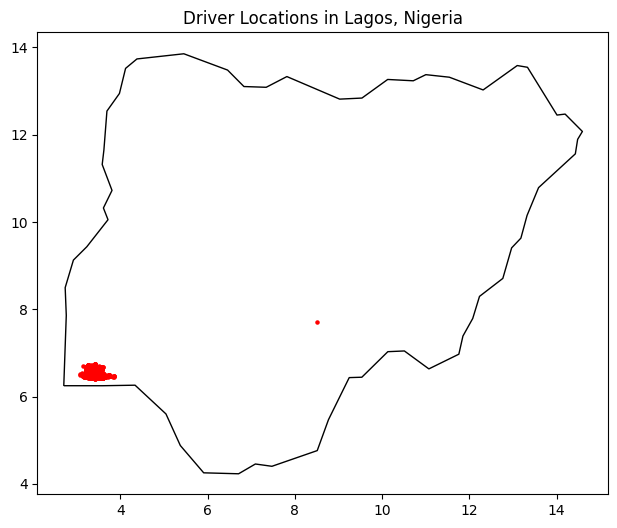

In [27]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame for driver locations
geometry = [Point(xy) for xy in zip(driver_locations_cleaned['lng'], driver_locations_cleaned['lat'])]
gdf = gpd.GeoDataFrame(driver_locations_cleaned, geometry=geometry)

# Plot the driver locations on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Nigeria'].plot(figsize=(10, 6), color='white', edgecolor='black')

# Plot driver locations
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('Driver Locations in Lagos, Nigeria')
plt.show()


In [ ]:
import folium

# Create a map centered around Lagos
m = folium.Map(location=[6.5244, 3.3792], zoom_start=12)

# Add points to the map
for idx, row in driver_locations_cleaned.iterrows():
    folium.CircleMarker(location=[row['lat'], row['lng']], radius=1, color='blue').add_to(m)

# Display the map
m


In [ ]:
# Load the completed orders dataset
completed_orders = pd.read_csv('data/nb.csv')

# Clean and preprocess completed orders data
completed_orders_cleaned = completed_orders.dropna(subset=['Trip Start Time', 'Trip End Time'])
completed_orders_cleaned['Trip Start Time'] = pd.to_datetime(completed_orders_cleaned['Trip Start Time'])
completed_orders_cleaned['Trip End Time'] = pd.to_datetime(completed_orders_cleaned['Trip End Time'])
completed_orders_cleaned[['Origin Lat', 'Origin Lon']] = completed_orders_cleaned['Trip Origin'].str.split(',', expand=True).astype(float)
completed_orders_cleaned[['Destination Lat', 'Destination Lon']] = completed_orders_cleaned['Trip Destination'].str.split(',', expand=True).astype(float)

# Merge driver locations with completed orders on 'order_id'
merged_data = pd.merge(driver_locations_cleaned, completed_orders_cleaned, left_on='order_id', right_on='Trip ID', how='inner')

# Calculate distance between driver location and order origin
merged_data['Driver to Origin Distance (km)'] = prepares.haversine_distance(
    merged_data['lat'], merged_data['lng'],
    merged_data['Origin Lat'], merged_data['Origin Lon']
)

# Display the first few rows of the merged data
merged_data_head = merged_data[['order_id', 'driver_id', 'Driver to Origin Distance (km)', 'Origin Lat', 'Origin Lon', 'lat', 'lng']].head()
merged_data_head


In [34]:
driver_locations_cleaned, completed_features

(              id  order_id  Driver ID Driver Action  Driver Lat  Driver Lon
 0              1    392001     243828      accepted    6.602207    3.270465
 1              2    392001     243588      rejected    6.592097    3.287445
 2              3    392001     243830      rejected    6.596133    3.281784
 3              4    392001     243539      rejected    6.596142    3.280526
 4              5    392001     171653      rejected    6.609232    3.288800
 ...          ...       ...        ...           ...         ...         ...
 1557735  1557736    517948     243774      rejected    6.469036    3.566877
 1557736  1557737    517948     245447      rejected    6.425431    3.527358
 1557737  1557738    517948     239866      rejected    6.440013    3.525378
 1557738  1557739    517948     243774      rejected    6.469036    3.566877
 1557739  1557740    517948     244170      rejected    6.469390    3.572079
 
 [1557740 rows x 6 columns],
         Trip ID      Trip Start Time        

In [35]:
# Merge driver locations with completed orders on 'order_id'
merged_data = pd.merge(driver_locations_cleaned, completed_features, left_on='order_id', right_on='Trip ID', )

In [37]:
merged_data.isna().sum()/len(merged_data) * 100

id                              0.0
order_id                        0.0
Driver ID                       0.0
Driver Action                   0.0
Driver Lat                      0.0
Driver Lon                      0.0
Trip ID                         0.0
Trip Start Time                 0.0
Trip End Time                   0.0
Trip Duration(minutes)          0.0
Day of Week                     0.0
Hour of Day                     0.0
Origin Lat                      0.0
Origin Lon                      0.0
Destination Lat                 0.0
Destination Lon                 0.0
Trip Distance (km)              0.0
Average Temperature(Celcius)    0.0
Wind Speed(km/h)                0.0
Air Pressure(hPa)               0.0
Is Cloudy                       0.0
Is Fair                         0.0
Is Fog                          0.0
Is Thunderstorm                 0.0
Is Heavy Rain Shower            0.0
Is Light Rain                   0.0
Is Rain                         0.0
Is Overcast                 

In [36]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504394 entries, 0 to 1504393
Data columns (total 32 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1504394 non-null  int64  
 1   order_id                      1504394 non-null  int64  
 2   Driver ID                     1504394 non-null  int64  
 3   Driver Action                 1504394 non-null  object 
 4   Driver Lat                    1504394 non-null  float64
 5   Driver Lon                    1504394 non-null  float64
 6   Trip ID                       1504394 non-null  int64  
 7   Trip Start Time               1504394 non-null  object 
 8   Trip End Time                 1504394 non-null  object 
 9   Trip Duration(minutes)        1504394 non-null  float64
 10  Day of Week                   1504394 non-null  int64  
 11  Hour of Day                   1504394 non-null  int64  
 12  Origin Lat                  

In [ ]:
# drop columns
merged_data = merged_data.drop(['Distance From Driver to Origin Distance (km)', 'order_id', ], axis=1)

In [46]:
# calculate the distance between driver location and order origin
merged_data['Distance From Driver to Origin(km)'] = prepares.haversine_distance(
    merged_data['Driver Lat'], merged_data['Driver Lon'],
    merged_data['Origin Lat'], merged_data['Origin Lon']
)

In [47]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504394 entries, 0 to 1504393
Data columns (total 34 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   id                                            1504394 non-null  int64  
 1   order_id                                      1504394 non-null  int64  
 2   Driver ID                                     1504394 non-null  int64  
 3   Driver Action                                 1504394 non-null  object 
 4   Driver Lat                                    1504394 non-null  float64
 5   Driver Lon                                    1504394 non-null  float64
 6   Trip ID                                       1504394 non-null  int64  
 7   Trip Start Time                               1504394 non-null  object 
 8   Trip End Time                                 1504394 non-null  object 
 9   Trip Duration(minutes)             

In [48]:
merged_data.head()

,id,order_id,Driver ID,Driver Action,Driver Lat,Driver Lon,Trip ID,Trip Start Time,Trip End Time,Trip Duration(minutes),...,Is Heavy Rain Shower,Is Light Rain,Is Rain,Is Overcast,Is Heavy Rain,Is Clear,Is Holiday,Is Weekend,Distance From Driver to Origin Distance (km),Distance From Driver to Origin(km)
0,1,392001,243828,accepted,6.602207,3.270465,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,...,0,0,0,0,0,0,0,0,0.693615,0.693615
1,2,392001,243588,rejected,6.592097,3.287445,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,...,0,0,0,0,0,0,0,0,1.554086,1.554086
2,3,392001,243830,rejected,6.596133,3.281784,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,...,0,0,0,0,0,0,0,0,0.788353,0.788353
3,4,392001,243539,rejected,6.596142,3.280526,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,...,0,0,0,0,0,0,0,0,0.694071,0.694071
4,5,392001,171653,rejected,6.609232,3.288800,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,...,0,0,0,0,0,0,0,0,1.623329,1.623329


In [49]:
merged_data.shape

(1504394, 34)

In [50]:
merged_data.columns

Index(['id', 'order_id', 'Driver ID', 'Driver Action', 'Driver Lat',
       'Driver Lon', 'Trip ID', 'Trip Start Time', 'Trip End Time',
       'Trip Duration(minutes)', 'Day of Week', 'Hour of Day', 'Origin Lat',
       'Origin Lon', 'Destination Lat', 'Destination Lon',
       'Trip Distance (km)', 'Average Temperature(Celcius)',
       'Wind Speed(km/h)', 'Air Pressure(hPa)', 'Is Cloudy', 'Is Fair',
       'Is Fog', 'Is Thunderstorm', 'Is Heavy Rain Shower', 'Is Light Rain',
       'Is Rain', 'Is Overcast', 'Is Heavy Rain', 'Is Clear', 'Is Holiday',
       'Is Weekend', 'Distance From Driver to Origin Distance (km)',
       'Distance From Driver to Origin(km)'],
      dtype='object')